In [234]:
# Assignment 1 Question 3
# This code was adapted from Professor Olson's Lecture 5 notebook
import numpy as np
import matplotlib.pyplot as plt


In [235]:
a = 0.9
hx = 0.1
ht = hx # As ht/hx must be equal to 1 as per the question
gamma = a * ht / hx
ks = np.arange(1,16)


Recall that $\gamma = \frac{a h_t}{h_x}$

**ITCS:**
$$
u_{k,\ell+1} = u_{k,\ell} - \frac{\gamma}{2} \left( u_{k+1,\ell+1} - u_{k-1,\ell+1} \right).
$$

In [236]:
s_ITCS = 1/(-gamma/2*np.exp(-1j*ks*hx) + 1 + gamma/2*np.exp(+1j*ks*hx))
omega_ITCS = 1j * np.log(s_ITCS) / ht



Recall that $\gamma = \frac{a h_t}{h_x}$

**Crank-Nicholson:**
$$
u_{k,\ell+1} = u_{k,\ell} - \frac{\gamma}{4} \left( u_{k+1,\ell+1} - u_{k-1,\ell+1} + u_{k+1,\ell} - u_{k-1,\ell} \right).
$$


In [237]:
s_CN = (1 - 1j * (gamma / 2) * np.sin(ks * hx)) / (1 + 1j * (gamma / 2) * np.sin(ks * hx))
omega_CN = 1j * np.log(s_CN) / ht


Recall that $\gamma = \frac{a h_t}{h_x}$

**Lax-Wendroff:**
$$
u_{k,\ell+1} = u_{k,\ell} - \frac{\gamma}{2} \left( u_{k+1,\ell} - u_{k-1,\ell} \right)
+ \frac{\gamma^2}{2} \left( u_{k+1,\ell} - 2u_{k,\ell} + u_{k-1,\ell} \right).
$$

In [238]:
s_LW = (
    # u_{k,l}
    1 - 2*gamma**2/2

    # u_{k+1,l}
    + np.exp(1j*ks*hx) * (-gamma/2 + gamma**2/2)

    # u_{k-1,l}
    + np.exp(-1j*ks*hx) * (gamma/2 + gamma**2/2)
    )

omega_LW = 1j*np.log(s_LW)/ht


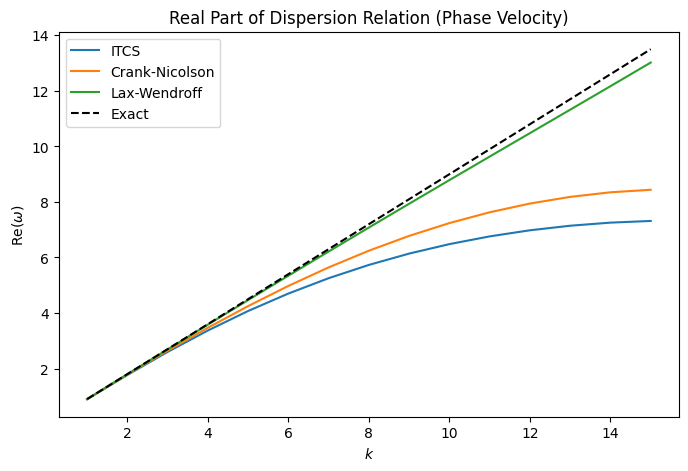

In [239]:
# Plot Real Part of ω: This graph represents the numerical dispersion relation,
# showing how the phase velocity (given by Re(ω)/k) compares with the exact value (a).
plt.figure(figsize=(8, 5))
plt.plot(ks, omega_ITCS.real, '-', label="ITCS")
plt.plot(ks, omega_CN.real, '-', label="Crank-Nicolson")
plt.plot(ks, omega_LW.real, '-', label="Lax-Wendroff")
plt.plot(ks, a * ks, 'k--', label="Exact")
plt.xlabel(r'$k$')
plt.ylabel(r'Re($\omega$)')
plt.title("Real Part of Dispersion Relation (Phase Velocity)")
plt.legend(loc="best")
plt.savefig("PhaseVelocity.png",dpi=300)
plt.show()


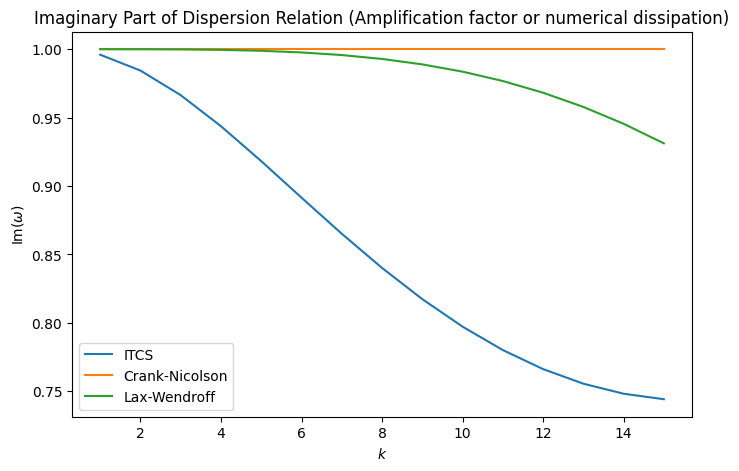

In [240]:

# Plot Imaginary Part of ω: This graph shows the imaginary component of ω,
# which equates to the amplification factor or numerical dissipation/growth rate.
# A value of zero indicates no dissipation (or growth), while nonzero values indicate
# numerical damping (if negative) or amplification (if positive).
plt.figure(figsize=(8, 5))
plt.plot(ks, np.abs(s_ITCS), '-', label="ITCS")
plt.plot(ks, np.abs(s_CN), '-', label="Crank-Nicolson")
plt.plot(ks, np.abs(s_LW), '-', label="Lax-Wendroff")
plt.xlabel(r'$k$')
plt.ylabel(r'Im($\omega$)')
plt.title("Imaginary Part of Dispersion Relation (Amplification factor or numerical dissipation)")
plt.legend(loc="best")
plt.savefig("Dissipation.png",dpi=300)
plt.show()